In [1]:
import sys
sys.path.append('../')
from src import load_dataset

import codecs, re, os
from os import path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valinquish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Données reconnaissance du locuteur (Chirac/Mitterrand)

## Analyse préliminaire

In [3]:
alltxts, alllabs = load_dataset()

print(f"Nombre de phrases [classes] : {len(alltxts)} [{len(alllabs)}]")
print(f"[Classe : {alllabs[0]}]", alltxts[0].rstrip())
print(f"[Classe : {alllabs[-1]}]", alltxts[-1].rstrip())
print(f"[Classe : {alllabs[12]}]", alltxts[12].rstrip())

print("Nombre de phrases prononcés par Chirac :", np.sum(np.array(alllabs) == 1), np.sum(np.array(alllabs) == 1) / len(alltxts) * 100, "%")
print("Nombre de phrases prononcés par Mitterand :", np.sum(np.array(alllabs) == -1), np.sum(np.array(alllabs) == -1) / len(alltxts) * 100, "%")

Nombre de phrases [classes] : 57413 [57413]
[Classe : 1]  Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.
[Classe : 1]  Je compte sur vous.
[Classe : -1]  C'est vrai qu'il y a très souvent dans notre pays un refus de regarder droit devant soi, comme un souhait d'en rester là, une certaine peur du changement, c'est vrai.
Nombre de phrases prononcés par Chirac : 49890 86.89669587027329 %
Nombre de phrases prononcés par Mitterand : 7523 13.103304129726718 %


Très rapidement on s'aperçoit d'un problème d'équilibrage dans notre jeu de données : preque 9 phrases sur 10 ont été prononcés par Chirac.

*Note* : 
- 1 correspond à Chirac (C)
- -1 correspond à Mitterand (M)

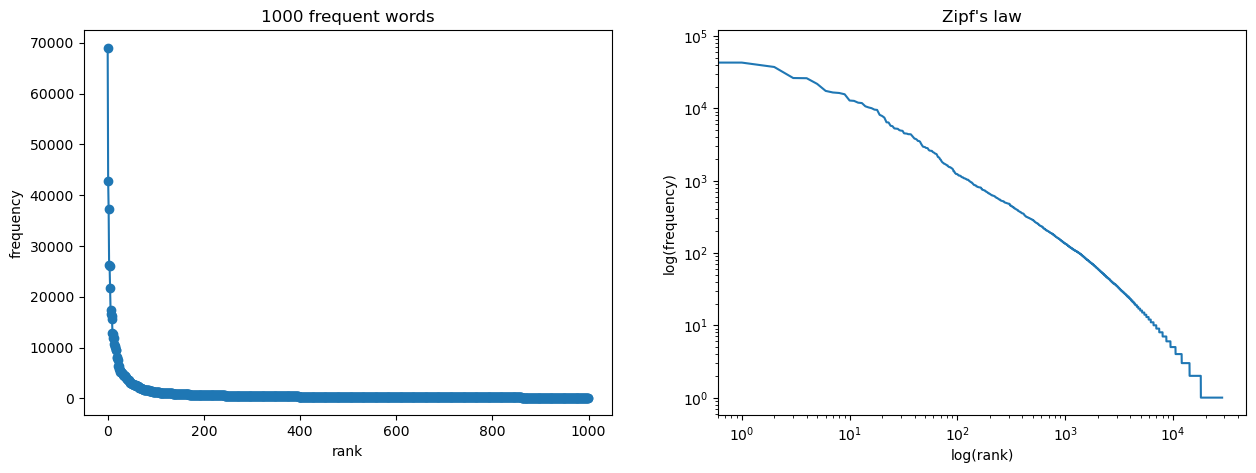

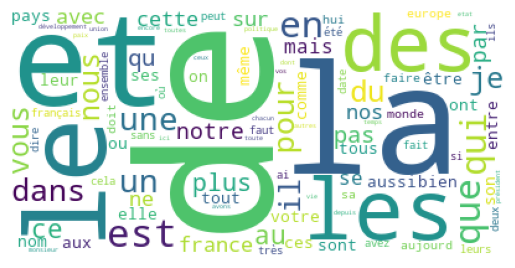

20 most frequent words
de      69031
la      42863
et      37281
le      26219
les     26067
des     21768
est     17401
en      16553
que     16292
qui     15635
un      12815
une     12669
pour    11964
dans    11820
du      10659
je      10286
il      10037
nous     9590
vous     9499
au       8122
dtype: int64


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

## BoW (without stopwords)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

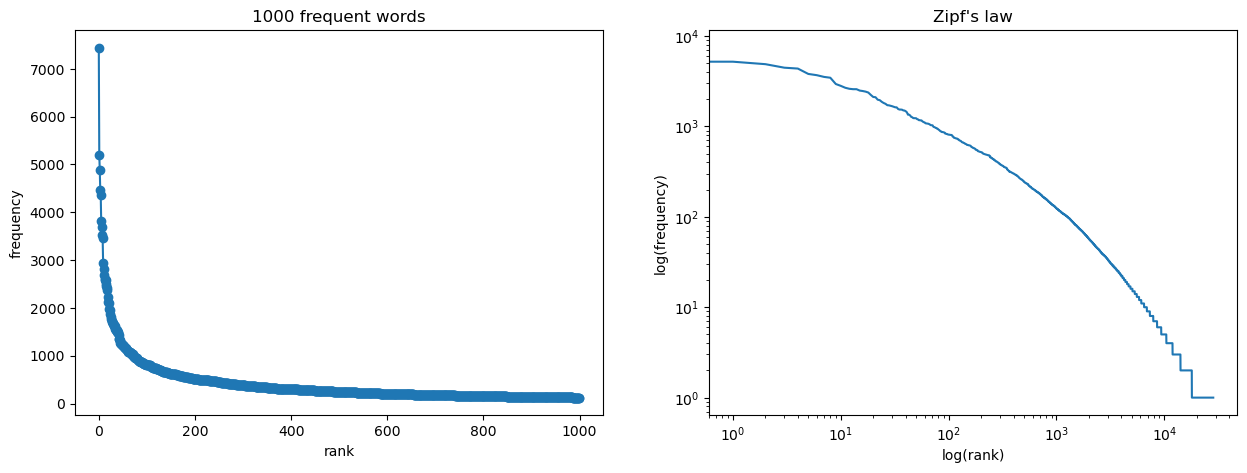

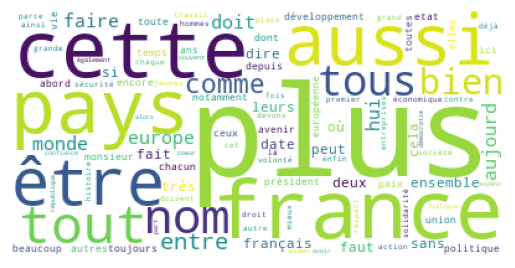

20 most frequent words
plus        7443
france      5201
cette       4883
pays        4464
aussi       4366
être        3808
tout        3688
nom         3530
tous        3457
bien        2945
comme       2811
entre       2678
europe      2609
hui         2582
aujourd     2581
monde       2492
doit        2463
faire       2426
français    2371
si          2231
dtype: int64


In [50]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("french"))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

## Un peu de dataviz 

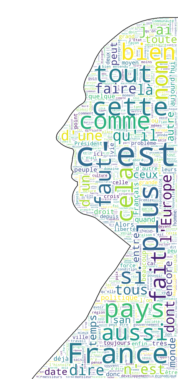

In [4]:
# Read the whole text.
d = "../reports/figures/"
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Mitterrand_Portrait.png"))

stopwords_list = set(STOPWORDS)
for word in stopwords.words("french"):
    stopwords_list.add(word)

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Mitterrand_Portrait_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

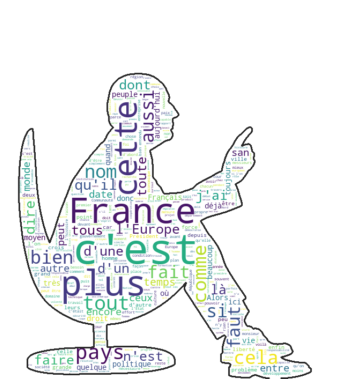

In [5]:
# Read the whole text.
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Mitterrand_Assis.png"))

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Mitterrand_Assis_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

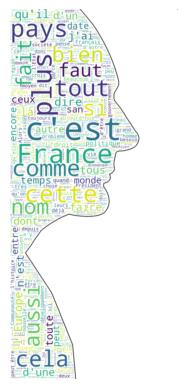

In [6]:
# Read the whole text.
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Chirac_Portrait.png"))

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Chirac_Portrait_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

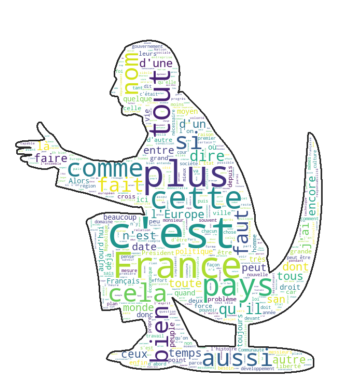

In [7]:
# Read the whole text.
text = "".join(np.array(alltxts)[np.array(alllabs) == -1])

# read the mask image
mask = np.array(Image.open("img/Chirac_Assis.png"))

wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords_list,
    contour_width=3,
    contour_color="#292929",
)

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "Chirac_Assis_WC.png"))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# A) Transformation paramétrique du texte (pre-traitements)

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

# B) Extraction du vocabulaire (BoW)

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendrent? Quels sont les avantages et les inconvénients des ces variantes?**

# C) Modèles de Machine Learning

## 1) Métriques d'évaluation 

Il faudra utiliser des métriques d'évaluation pertinentes suivant la tâche et l'équilibrage des données : 
- Accuracy
- Courbe ROC, AUC, F1-score

## 2) Variantes sur les stratégies d'entraînement

- **Sur-apprentissage**. Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente).

 <br>
- **Equilibrage des données**. Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (*balance* en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes?
Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.<BR>
   $\Rightarrow$ A vous de jouer pour cette technique
1. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:
soit une fonction $\Delta$ mesurant les écarts entre $f(x_i)$ et $y_i$ 
$$C = \sum_i  \alpha_i \Delta(f(x_i),y_i), \qquad \alpha_i = \left\{
\begin{array}{ll}
1 & \text{si } y_i \in \text{classe majoritaire}\\
B>1 & \text{si } y_i \in \text{classe minoritaire}\\
\end{array} \right.$$
<BR>
   $\Rightarrow$ Les SVM et d'autres approches sklearn possèdent des arguments pour régler $B$ ou $1/B$... Ces arguments sont utiles mais pas toujours suffisant.
1. Courbe ROC et modification du biais. Une fois la fonction $\hat y = f(x)$ apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions $\hat y$ sont dans une classe, on va introduire $b$ dans $\hat y = f(x) + b$ et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin.
Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.

**Note:** certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting que vous verrez l'an prochain.


## 3) Estimer les performances de généralisation d'une méthodes
**Ce sera l'enjeu principal du projet : vous disposez d'un ensemble de données, et vous évaluerez les performances sur un ensemble de test auquel vous n'avez pas accès. Il faut donc être capable d'estimer les performances de généralisation du modèles à partir des données d'entraînement.**


Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

- Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?
- La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple *split*?
- La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)?